In [1]:
%matplotlib inline
import pyne
from decay_compare import *
from pyne import data
from pyne import rxname
import tables as tb

/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
%%time
nucs = cram.NUCS
n = 16
nucs = cram.NUCS[100*n:100*(n+1)]
nucs = ['Cs144', 'Ba144', 'La144','Ce144', 'Pr144', 'Nd144', 'Ce140']
batemans, crammeds, diagexps = run_nuclides(nucs=nucs, verbose=True)

Running nuc Cs144
Running nuc Ba144
Running nuc La144
Running nuc Ce144
Running nuc Pr144
Running nuc Nd144
Running nuc Ce140
CPU times: user 1.95 s, sys: 12 ms, total: 1.96 s
Wall time: 1.96 s


In [3]:
NNUCS = len(crammeds)

In [4]:
b = np.zeros((NTIMES, NNUCS), dtype=float)
c = np.zeros((NTIMES, NNUCS), dtype=float)
d = np.zeros((NTIMES, NNUCS), dtype=float)
for n, nuc in enumerate(nucs):
    b[:, n] = batemans[nuc][nuc]
    c[:, n] = crammeds[nuc][nuc]
    d[:, n] = diagexps[nuc][nuc]

In [5]:
diagdiff = np.abs(d - c)
mu_diagdiff = diagdiff.mean(axis=1)
sigma_diagdiff = diagdiff.std(axis=1)

In [6]:
sigma_diagdiff

array([  0.000000000000000000e+00,   1.784494659921585531e-15,
         3.237955258989155142e-15,   2.861927129518370901e-15,
         3.569190291141976216e-15,   1.526689747049519412e-15,
         1.710744486115372453e-15,   1.954526071081735523e-15,
         1.933886686160730488e-15,   1.897328430138105775e-15,
         1.521480824208055313e-15,   3.252559949613403874e-15,
         1.528183018465234982e-15,   1.500821331016426329e-15,
         1.643430637434555357e-15,   1.341408866695744125e-15,
         2.864333236904184749e-15,   3.867437315325515640e-15,
         1.689291425523623409e-15,   2.394579406129548296e-15,
         1.225782729921124631e-15,   1.419888277180349024e-15,
         1.231567744170265869e-15,   1.197664339355094010e-15,
         1.215911695992022921e-15,   2.081114190048194316e-15,
         1.534613904408205019e-15,   1.584562252893964280e-15])

# Difference plot for all nuclides

The red line is the mean difference with $1\sigma$ error bars

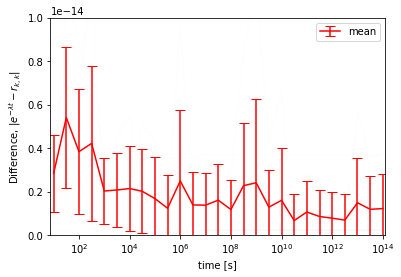

In [7]:
plt.plot(TIMES[1:], diagdiff[1:, :], color='gray', alpha=0.01)
plt.errorbar(TIMES[1:], mu_diagdiff[1:], yerr=sigma_diagdiff[1:], color='red', capsize=5, label='mean')
plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 0.0, 1e-14])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
plt.legend(loc=0)

# Bateman Comparison

In [8]:
def bateman_diff_plot(nuc, batemans, crammeds):
    try:
        bateman = batemans[nuc]
        crammed = crammeds[nuc]
    except KeyError:
        print('Nuclide not in data!')
        return
    diff = diff_nuclide(bateman, crammed, abs=True)
    d = np.zeros((NTIMES, len(diff)), dtype=float)
    for i, (n, arr) in enumerate(diff.items()):
        if data.fpyield(nuc, n) > 0:
            print('skipping', n)
            continue
        plt.plot(TIMES, arr, label=n)
        d[:,i] = arr
    mu = d.mean(axis=1)
    sigma = d.std(axis=1)
    #plt.errorbar(TIMES, mu, yerr=sigma, capsize=5, color='black', label='mean')
    plt.xscale('log')
    #plt.yscale('log')
    #plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 1e-18, 1e-6])
    plt.xlabel('time [s]')
    plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
    plt.legend(loc=0)

In [9]:
#bateman_diff_plot('I131', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('Sr90', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('H3', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('U235', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('Se86', batemans=batemans, crammeds=crammeds)

# Histogram of errors

In [10]:
diff_arrs = []
for nuc in nucs:
    diff = diff_nuclide(batemans[nuc], crammeds[nuc], abs=True, include_missing=False)
    diff_arr = np.empty((NTIMES, len(diff)), dtype=float)
    for i, (n, d) in enumerate(diff.items()):
        diff_arr[:,i] = d
        if np.abs(d).max() >= 1e-6:
            print(nuc, '->', n)
    diff_arrs.append(diff_arr)
diff_arrs = np.concatenate(diff_arrs, axis=1)
diff_arrs.shape

Ce144 -> Nd144


(28, 33)

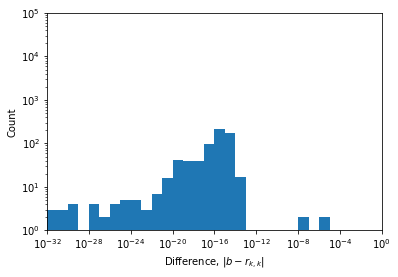

In [11]:
plt.hist(diff_arrs.flat, bins=np.logspace(-32, 0, 33), log=True)
plt.xscale('log')
plt.axis([1e-32, 1, 1e0, 1e5])
plt.xlabel('Difference, $\\left|b - r_{k,k}\\right|$')
plt.ylabel('Count')

Ce144 -> Nd144

CRAM
 [  0.000000000000000000e+00   9.391548017205202558e-10
   9.346505208611546096e-09   9.206184509779060325e-08
   8.782783375775477240e-07   7.623322610428969663e-06
   5.200888559208237443e-05   2.394859271181023434e-04
   8.479595259979090917e-04   2.769851813196221556e-03
   8.823113384416070640e-03   2.772444759299403511e-02
   8.515602770368761731e-02   2.453787571621586228e-01
   5.895070721333124375e-01   9.401415267544409593e-01
   9.998642023785856425e-01   9.999999999993980371e-01
   9.999999999999602540e-01   9.999999999999051870e-01
   9.999999999996976863e-01   9.999999999990362154e-01
   9.999999999969524378e-01   9.999999999904181092e-01
   9.999999999696539410e-01   9.999999999040897203e-01
   9.999999996966947302e-01   9.999999990408549033e-01]
Bateman
 [  0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   4.692331807676364264e-05   2.3

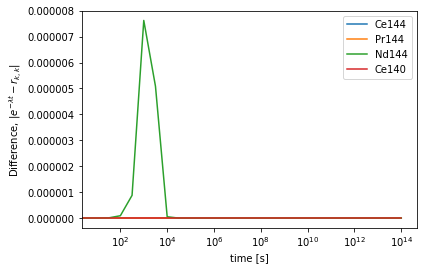

In [12]:
nuc = 'Ce144'
ouc = 'Nd144'
print(nuc + ' -> ' + ouc + '\n')
print('CRAM\n', crammeds[nuc][ouc])
print('Bateman\n', batemans[nuc][ouc])
print('Diff\n', batemans[nuc][ouc] - crammeds[nuc][ouc])
bateman_diff_plot(nuc, batemans=batemans, crammeds=crammeds)

In [13]:
data.branch_ratio('Ce144', 'Pr144')


1.0

In [14]:
data.decay_children(nucname.id('Ce144'))

set([591440000])

In [15]:
data.decay_const('Ce144')

2.8158144017536774e-08

In [16]:
data.decay_const('Pr144')

0.0006685447343363669

In [17]:
data.decay_const('Nd144')

9.591488526476038e-24

In [18]:
data.half_life('Nd144')

7.2266904e+22

In [19]:
9.591488526476038e-24 / 2.8158144017536774e-08

3.406292872322302e-16